# RIDGE REGRESSION

IMPORT delle LIBRERIE necessarie

In [64]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
black = "\033[1;30;48m"
red = "\033[1;31;48m"
blue = "\033[1;34;48m"

FUNZIONE per PLOT

In [66]:
def plot_data(data): 
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

CREAZIONE dei dati casuali secondo una FUNZIONE SPECIFICA

In [67]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()
y = x.apply(lambda x: math.sin(4*x))

CREAZIONE SFRAME dati senza rumore

In [68]:
data = graphlab.SFrame({'X1':x, 'Y':y})

PLOT

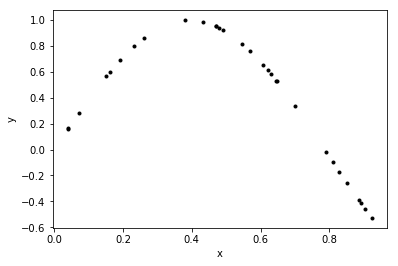

In [69]:
plot_data(data)

CREAZIONE del rumore 

In [70]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

CREAZIONE SFRAME DATI + RUMORE

In [71]:
data_noise = graphlab.SFrame({'X1':x, 'Y':y})

PLOT

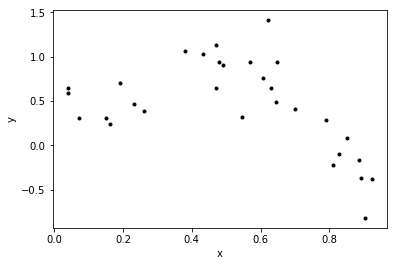

In [72]:
plot_data(data_noise)

CREAZIONE delle FEATURES polinomiali

In [73]:
# data : SFrame - grado : grado del polinomio
def polynomial_features(data, grado):
    copy = data.copy()
    
    # creo una colonna per ogni grado del polinomio da 1 a grado
    for i in range(1,grado):
        copy['X'+str(i+1)]=copy['X'+str(i)]*copy['X1']
    return copy

REGRESSION con graphlab

In [74]:
def polynomial_regression(data, grado, l2 = 0., l1 = 0.):
    model = graphlab.linear_regression.create(polynomial_features(data, grado),
                                              target='Y', 
                                              l2_penalty=l2,
                                              l1_penalty=l1,
                                              validation_set=None,
                                              verbose=False)
    return model

In [75]:
copy = polynomial_features(data_noise, grado=3)
copy

X1,Y,X2,X3
0.0395789449501,0.587050191026,0.00156649288336,6.20001355952e-05
0.0415680996791,0.648655851372,0.00172790691093,7.18258067099e-05
0.0724319480801,0.307803309485,0.00524638710267,0.000380006038229
0.150289044622,0.310748447417,0.0225867969334,0.0033945481322
0.161334144502,0.237409625496,0.0260287061823,0.00419931904442
0.191956312795,0.705017157224,0.0368472260218,0.00707305764388
0.232833917145,0.461716676992,0.0542116329729,0.0126223068599
0.259900980166,0.383260507851,0.0675485194911,0.0175559264245
0.380145814869,1.06517691429,0.144510840562,0.0549351912429
0.432444723508,1.03184706949,0.18700843889,0.0808708126494


METODI di SUPPORTO

In [76]:
def plot_poly_predictions(data, model):
    plot_data(data)
    
    grado = len(model.coefficients['value'])-1
    
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred, grado))
    
    # stampa
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(grado) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])


In [77]:
def print_coefficients(model):
    grado = len(model.coefficients['value'])-1
    
    w = list(model.coefficients['value'])
    w.reverse()
    
    overfit = False
    
    for peso in w:
        if peso > 1000:
            overfit = True
        
    if overfit == False:
        print(blue + 'Grado ' + str(grado) + ':')
        print numpy.poly1d(w)
    else:
        print(red + 'Grado ' + str(grado) + ':')
        print(numpy.poly1d(w))

## CREAZIONE del MODELLO

· PROVO senza L2

In [78]:
model = polynomial_regression(data_noise, grado=14)
print_coefficients(model)

Grado 14:
           14             13            12             11
7.086e+05 x  - 3.313e+06 x  + 6.44e+06 x  - 6.073e+06 x 
              10             9             8             7
 + 9.087e+05 x  + 5.234e+06 x - 7.751e+06 x + 6.056e+06 x
              6             5            4             3        2
 - 3.002e+06 x + 9.675e+05 x - 1.98e+05 x + 2.412e+04 x - 1516 x + 31.76 x + 0.6587


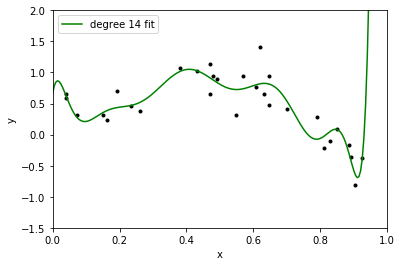

In [79]:
plot_poly_predictions(data_noise,model)

Se i COEFFICIENTI crescono in maniera smisurata ( e.g. e+06 ) sta avvenendo l'OVERFITTING

· PROVO con L2 molto PICCOLO e ricalcolo

In [80]:
model_smallL2 = polynomial_regression(data_noise, grado=14, l2=1e-30)
print_coefficients(model_smallL2)

Grado 14:
           14             13            12             11
7.086e+05 x  - 3.313e+06 x  + 6.44e+06 x  - 6.073e+06 x 
              10             9             8             7
 + 9.087e+05 x  + 5.234e+06 x - 7.751e+06 x + 6.056e+06 x
              6             5            4             3        2
 - 3.002e+06 x + 9.675e+05 x - 1.98e+05 x + 2.412e+04 x - 1516 x + 31.76 x + 0.6587


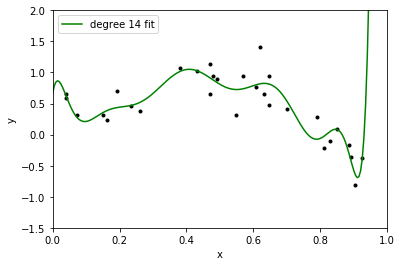

In [81]:
plot_poly_predictions(data_noise,model_smallL2)

· PROVO con diversi L2 crescenti e ricalcolo

L2 = 1.00e-25
Grado 14:
           14             13            12             11
7.086e+05 x  - 3.313e+06 x  + 6.44e+06 x  - 6.073e+06 x 
              10             9             8             7
 + 9.087e+05 x  + 5.234e+06 x - 7.751e+06 x + 6.056e+06 x
              6             5            4             3        2
 - 3.002e+06 x + 9.675e+05 x - 1.98e+05 x + 2.412e+04 x - 1516 x + 31.76 x + 0.6587


L2 = 1.00e-10
Grado 14:
           14             13             12             11        10
5.152e+04 x  - 1.169e+05 x  + 2.977e+04 x  + 7.588e+04 x  + 2569 x 
              9             8             7             6             5
 - 5.639e+04 x - 2.191e+04 x + 4.067e+04 x + 1.876e+04 x - 4.063e+04 x
              4        3         2
 + 2.153e+04 x - 5534 x + 763.7 x - 54.11 x + 1.856




L2 = 1.00e-06
Grado 14:
        14         13         12         11         10         9
-49.78 x  - 53.71 x  + 78.28 x  + 122.4 x  + 44.54 x  - 74.76 x
          8         7         6         5         4         3         2
 - 127.3 x - 61.53 x + 67.16 x + 121.6 x + 5.816 x - 144.4 x + 83.25 x - 14.21 x + 1.04


L2 = 1.00e-04
Grado 14:
       14          13         12         11         10         9
18.53 x  + 0.7986 x  - 9.202 x  - 12.78 x  - 10.53 x  - 3.422 x
          8         7         6          5         4         3
 + 6.168 x + 13.72 x + 13.19 x + 0.5891 x - 18.01 x - 17.68 x
          2
 + 23.22 x - 5.158 x + 0.7086




L2 = 1.00e-03
Grado 14:
         14         13         12          11         10        9
-0.2542 x  - 2.856 x  - 2.497 x  - 0.4618 x  + 2.106 x  + 4.16 x
          8         7          6         5        4         3         2
 + 4.751 x + 3.155 x - 0.7544 x - 5.751 x - 8.24 x - 2.689 x + 9.764 x - 2.198 x + 0.5624


L2 = 1.00e+02
Grado 14:
        14          13         12          11          10          9
-0.298 x  - 0.2745 x  - 0.252 x  - 0.2304 x  - 0.2094 x  - 0.1889 x
           8          7          6         5           4           3
 - 0.1685 x - 0.1478 x - 0.1266 x - 0.104 x - 0.07959 x - 0.05295 x
            2
 - 0.02551 x - 0.003334 x + 0.6405




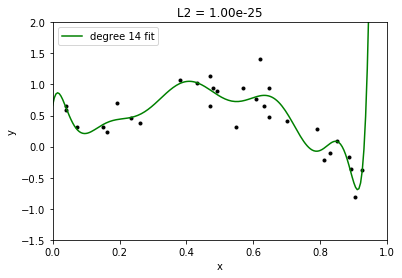

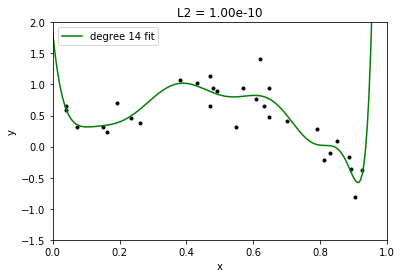

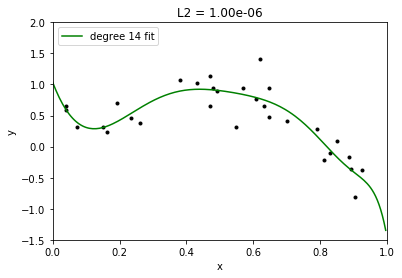

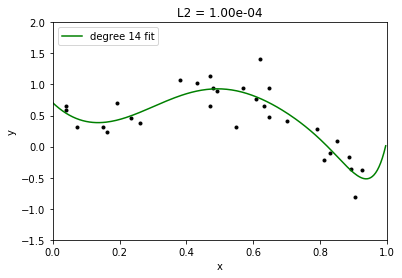

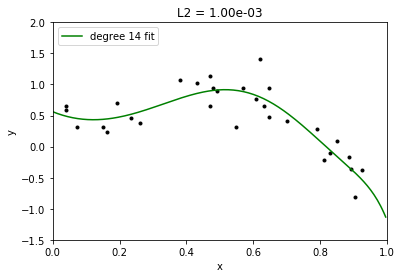

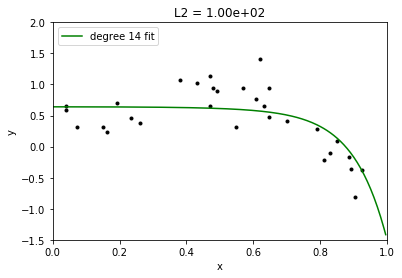

In [82]:
for l2 in [1e-25, 1e-10, 1e-6, 1e-4, 1e-3, 1e2]:
    model = polynomial_regression(data_noise, grado=14, l2=l2)
    print(black + 'L2 = %.2e' % l2)
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data_noise,model)
    plt.title('L2 = %.2e' % l2)

## LEAVE ONE OUT cross validation 

In [83]:
def loo(dataset, grado, l2):
    data = polynomial_features(dataset, grado)
    
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data, num_folds)
    
    l2_penalty_mae = []
    min_mae = None
    best_l2_penalty = None
    
    for l2_value in l2:
        next_mae = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create( train_set, target='Y',
                                                      l2_penalty=l2_value,
                                                      validation_set=None,
                                                      verbose=False )
            y_test_predicted = model.predict(validation_set)
            next_mae += (abs(y_test_predicted-validation_set['Y'])).sum()
        
        next_mae = next_mae/num_folds
        l2_penalty_mae.append(next_mae)
        if min_mae is None or next_mae < min_mae:
            min_mae = next_mae
            best_l2_penalty = l2_value
            
    return l2_penalty_mae,best_l2_penalty

Risultati e PLOT

In [85]:
l2 = numpy.logspace(-4, 10, num=10)
l2_penalty_mae,best_l2_penalty = loo(data_noise, 14, l2)

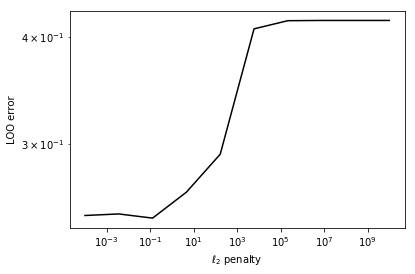

In [25]:
plt.plot(l2,l2_penalty_mae,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO error')
plt.xscale('log')
plt.yscale('log')

## RIPETO la REGRESSION con il BEST L2

Grado 14:
       14         13          12          11          10          9
1.844 x  + 1.309 x  + 0.7965 x  + 0.3088 x  - 0.1481 x  - 0.5632 x
           8         7         6         5          4           3
 - 0.9175 x - 1.181 x - 1.304 x - 1.215 x - 0.8217 x - 0.07562 x
           2
 + 0.7818 x + 0.7811 x + 0.3898


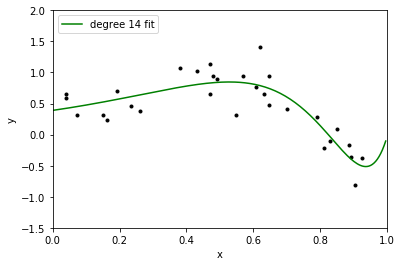

In [26]:
model = polynomial_regression(data_noise, grado=14, l2=best_l2_penalty)
print_coefficients(model)
plot_poly_predictions(data_noise,model)

------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

In [27]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    features = ['constant'] + features
    
    features_sframe = data_sframe[features]
    features_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    return(features_matrix, output_array)

In [28]:
def predict_output(feature_matrix, pesi):
    predictions = []
    for col in range(feature_matrix.shape[0]):
        predictions.append(numpy.dot(feature_matrix[col,], pesi))
    return predictions

In [108]:
def feature_derivative(errors, feature):
    derivative = 2*numpy.dot(feature,errors)
    return derivative

In [109]:
def gradient_descent_RR(feature_matrix, output, pesi_iniziali, step_size, l2, tolleranza):
    converged = False
    pesi = numpy.array(pesi_iniziali)
    
    while not converged:
        predictions = predict_output(feature_matrix, pesi)
        errors = predictions - output
        gradient_cost = 0
        
        for i in xrange(len(pesi)):
            derivata = feature_derivative(errors, feature_matrix[ : , i])
            
            if(i==0):
                pesi[i] -= step_size * derivata
                gradient_cost = gradient_cost + derivata**2
            else:
                pesi[i] = (1-2*step_size*l2)*pesi[i] - step_size*derivata
                gradient_cost = gradient_cost + ((derivata + 2*l2*pesi[i])**2)
        
        gradient_magnitude = math.sqrt(gradient_cost)
        print gradient_magnitude
        if gradient_magnitude < tolleranza:
            converged = True
    return pesi

In [98]:
step_size = 7e-12
tolerance = 2.5e7

Grado 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


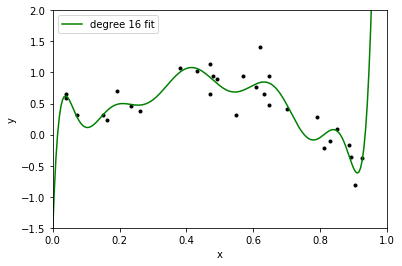

In [97]:
model_2 = polynomial_regression(data_noise, grado=16, l2=1e-25)
print_coefficients(model_2)
plot_poly_predictions(data_noise, model_2)

In [110]:
(features_matrix, output_array) = get_numpy_data(data_noise, ['X1'], 'Y')
pesi_iniziali = numpy.array([-47000., 1.])
pesi = gradient_descent_RR(features_matrix, output_array, pesi_iniziali ,step_size, best_l2_penalty ,tolerance)
print pesi

3183943.68373
[ -4.70000000e+04   1.00001035e+00]
